# Microsoft Movie Studio Project
### unused code notebook

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import seaborn as sns
import sqlite3

%matplotlib inline

Folder with saved files 

In [2]:
! ls ../zippedData/

GrossMargin_and_genre_df.csv
Merged_df_TMDB_TN.csv
Netflix_movies_and_tv_shows_clustering.csv.zip
Top_20_Movies_by_Gross_Profit.png
Top_20_Movies_by_Gross_Profit_2.png
Top_20_Movies_by_Gross_Profit_3.png
all-weeks-global.tsv
bom.movie_gross.csv.gz
highest rated movies from TMDB action adv.png
highest rated movies from TMDB drama.png
im.db.zip
most popular movie titles from TMDB.png
netflix_top20_titles_hours.png
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz
top-netflix-scraper.ipynb
video game movies worldwide box office.png
video_game_films.csv


# Exploring bom.movie_gross.csv.gz

In [3]:
df_bom = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# Exploring rt.movie_info.tsv.gz

In [4]:
df_rt = pd.read_csv('../zippedData/rt.movie_info.tsv.gz', delimiter='\t')
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


# Exploring tmdb.movies.csv.gz

In [5]:
df_tmdb = pd.read_csv('../zippedData/tmdb.movies.csv.gz', index_col=[0])
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


[Genre ID values and Asociated name](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee)
- The page has all meaning for each of the genre_ids codes, will change all id values, so genres can be desplayed from data frame

# Exploring tn.movie_budgets.csv.gz

In [6]:
df_tn = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Transform all numeric columns from object to int

Removing all commas from production_budget column

In [7]:
df_tn['production_budget'] = df_tn['production_budget'].str.replace(',','')

Removing all $ sign from production_budget column

In [8]:
df_tn['production_budget'] = df_tn['production_budget'].str.replace('$','')

In [9]:
df_tn.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350"


Following the same steps for domestic_gross and worldwide_gross columns

In [10]:
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace(',','')
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace('$','')

In [11]:
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace(',','')
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace('$','')

Converting values from str to int

In [12]:
df_tn['production_budget'] = df_tn['production_budget'].astype(int)
df_tn['domestic_gross'] = df_tn['domestic_gross'].astype(int)
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].astype(int)

In [13]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


Creating a new column with gross profit for each movie(row), substracting production budget from total worldwide_gross

In [14]:
df_tn['gross_profit']= df_tn['worldwide_gross'] - df_tn['production_budget']


Movies with largest gross profit

In [15]:
df_tn.sort_values(by=['gross_profit'], ascending=False).head(3)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200





## Merging 2 data frames to get genre column into frame with movies earnings


Merging TMDB and TN data frames, TMDB contains movie's genres column and TN has gross profit information, by merging the two frames we can find which generes had better results in the box office.



In [16]:
#set movie column as index, therefore both dataframes can merge based on matching values from its respective index
df_tmdb.set_index(['title'], inplace= True)
df_tn.set_index(['movie'], inplace= True)


In [17]:
merged_df = df_tn.merge(df_tmdb, how = 'inner', left_index=True, right_index=True)
merged_df.shape

(2385, 14)

### Replace values from genre_ID column with specific genre name

[Genre ID values and Asociated name URL](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee)

- The page has all meaning for each of the genre_ids codes, below i remplaced all IDs so genres can be desplayed from data frame


In [18]:
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('12', 'Adventure')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('28', 'Action')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('16', 'Animation')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('35', 'Comedy')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('80', 'Crime')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('99', 'Documentary')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('18', 'Drama')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10751', 'Family')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('14', 'Fantasy')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('36', 'History')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('27', 'Horror')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10402', 'Music')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('9648', 'Mystery')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10749', 'Romance')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('878', 'Science Fiction')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10770', 'TV Movie')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('53', 'Thriller')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('10752', 'War')
merged_df['genre_ids'] = merged_df['genre_ids'].str.replace('37', 'Western')

Some of the movies have missing data under the genre id column

In [19]:
merged_df.loc[merged_df['genre_ids'] == '[]']


,id_x,release_date_x,production_budget,domestic_gross,worldwide_gross,gross_profit,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
Alice in Wonderland,51,"Mar 5, 2010",200000000,334191110,1025491110,825491110,[],423971,en,Alice in Wonderland,0.600,2010-01-01,6.0,1
Alice in Wonderland,60,"Jul 28, 1951",3000000,0,0,-3000000,[],423971,en,Alice in Wonderland,0.600,2010-01-01,6.0,1
Alpha,79,"Aug 17, 2018",51000000,35851379,99624873,48624873,[],333465,el,A,0.840,2015-01-25,7.0,1
Animals,34,"Dec 31, 2008",5500000,0,0,-5500000,[],439312,en,Animals,0.600,2016-10-19,6.5,2
Breaking In,19,"May 11, 2018",6000000,46840590,51411620,45411620,[],403153,en,Breaking In,0.600,2014-01-01,2.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Transcendence,2,"Apr 18, 2014",100000000,23022309,103039258,3039258,[],274278,en,Transcendence,0.600,2012-06-09,5.5,2
Trapped,87,"Sep 20, 2002",30000000,6916869,6916869,-23083131,[],159783,en,Trapped,0.655,2012-04-01,5.8,2
Trash,46,"Oct 9, 2015",12000000,17484,6553186,-5446814,[],128184,es,Trash,0.600,2010-11-03,3.0,3
Undiscovered,7,"Aug 26, 2005",9000000,1069318,1069318,-7930682,[],513161,en,Undiscovered,0.600,2018-04-07,8.0,1


### Drop movies without genre

Below im setting all movies which show  '[]' on the genre_ID column, to show NaN instead 

In [20]:
merged_df.loc[merged_df['genre_ids'] == '[]', 'genre_ids'] = None

Droping all NaN from that column

In [21]:
merged_df = merged_df.dropna(subset=['genre_ids'])

### Change general genre categories to specific category


some of the movies were tagged with multiple genres, when looking for a value_count for all generes it will show each unique combination of generes like a singular value, below I used a for loop to change some of the most frequent combinations of generes to the more prominent value between the options

In [22]:
merged_df_copy = merged_df.copy() #made a copy of data frame just in case outcome isn't the one desired


In [23]:
merged_df_copy_list = merged_df_copy['genre_ids'].tolist()


In [24]:
def contains_Drama(lst):
    new_list=[]
    for x in lst:
        if x == '[Drama, History]':
            x = '[Drama]'
        new_list.append(x)
            
            
    return new_list

In [25]:
lis1 = contains_Drama(merged_df_copy_list)

In [26]:
def contains_Horror(lst):
    new_list=[]
    for x in lst:
        if x == '[Horror, Thriller]' or x == '[Thriller, Horror]':
            x = '[Horror]'
        new_list.append(x)
            
            
    return new_list

In [27]:
lis2 = contains_Horror(lis1)

In [28]:
def contains_Romance(lst):
    new_list=[]
    for x in lst:
        if x == '[Drama, Romance]' or x == '[Comedy, Drama, Romance]':
            x = '[Drama]'
        new_list.append(x)
            
            
    return new_list

In [29]:
lis3 = contains_Romance(lis2)

In [30]:
def contains_Thriller(lst):
    new_list=[]
    for x in lst:
        if x == '[Drama, Thriller]' or x == '[Thriller, Drama]':
            x = '[Thriller]'
        new_list.append(x)
            
            
    return new_list

In [31]:
lis4 = contains_Thriller(lis3)

In [32]:
def contains_romcoms(lst):
    new_list=[]
    for x in lst:
        if x == '[Comedy, Romance]' or x == '[Comedy, Drama]' or x == '[Comedy, Drama, Romance]':
            x = '[Comedy]'
        new_list.append(x)
            
            
    return new_list

In [33]:
lis5 = contains_romcoms(lis4)

In [34]:
def contains_history(lst):
    new_list=[]
    for x in lst:
        if x == '[Drama, History]':
            x = '[History]'
        new_list.append(x)
            
            
    return new_list

In [35]:
lis6 = contains_history(lis5)

In [36]:
def contains_action(lst):
    new_list=[]
    for x in lst:
        if x == '[Action, Adventure, Science Fiction]'or x == '[Action, Thriller]' or x == '[Action, Crime, Thriller]':
            x = '[Action]'
        new_list.append(x)
            
            
    return new_list

In [37]:
lis7 = contains_action(lis6)

In [38]:
# def contains_action1(lst):
#     new_list=[]
#     for x in lst:
#         if '[Action, Adventure,' in x:
#             x = '[Action]'
#         new_list.append(x)
            
            
#     return new_list

In [39]:
# lis8 = contains_action(lis7)

In [40]:
merged_df_copy['genre_ids'] = lis7


## Update main Dataframe with new categories

All steps above we made to a copy of the DataFrame


In [41]:
merged_df['genre_ids'] = merged_df_copy['genre_ids']

In [42]:
merged_df['genre_ids'].value_counts().head(20)

[Drama]                        335
[Comedy]                       219
[Horror]                       128
[Thriller]                      85
[Action]                        75
[Documentary]                   69
[Drama, Comedy]                 26
[Crime, Drama, Thriller]        20
[Romance, Drama]                18
[Drama, Music]                  16
[Drama, Comedy, Romance]        14
[Action, Comedy]                14
[Crime, Thriller]               14
[Romance, Comedy]               12
[Thriller, Crime, Drama]        11
[Action, Drama, Thriller]       11
[Drama, Crime]                  11
[Action, Comedy, Crime]         11
[Action, Crime]                 10
[Animation, Comedy, Family]     10
Name: genre_ids, dtype: int64

In [44]:
merged_df['gross_profit_by_millions'] = merged_df['gross_profit'] / 1000000

###  Save as new file

In [45]:
df = merged_df.copy()

In [46]:
# df.to_csv('Merged_df_TMDB_TN.csv')

## Opening new file

In [47]:
! ls ../zippedData/

GrossMargin_and_genre_df.csv
Merged_df_TMDB_TN.csv
Netflix_movies_and_tv_shows_clustering.csv.zip
Top_20_Movies_by_Gross_Profit.png
Top_20_Movies_by_Gross_Profit_2.png
Top_20_Movies_by_Gross_Profit_3.png
all-weeks-global.tsv
bom.movie_gross.csv.gz
highest rated movies from TMDB action adv.png
highest rated movies from TMDB drama.png
im.db.zip
most popular movie titles from TMDB.png
netflix_top20_titles_hours.png
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz
top-netflix-scraper.ipynb
video game movies worldwide box office.png
video_game_films.csv


In [105]:
df = pd.read_csv('../zippedData/Merged_df_TMDB_TN.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1900 non-null   int64  
 1   Unnamed: 0.1              1900 non-null   object 
 2   id_x                      1900 non-null   int64  
 3   release_date_x            1900 non-null   object 
 4   production_budget         1900 non-null   int64  
 5   domestic_gross            1900 non-null   int64  
 6   worldwide_gross           1900 non-null   int64  
 7   gross_margin              1900 non-null   int64  
 8   genre_ids                 1900 non-null   object 
 9   id_y                      1900 non-null   int64  
 10  original_language         1900 non-null   object 
 11  original_title            1900 non-null   object 
 12  popularity                1900 non-null   float64
 13  release_date_y            1900 non-null   object 
 14  vote_ave

## Plot, top genres by gross profit

In [115]:
df_mean = df.groupby(['genre_ids'])['gross_profit_by_millions'].mean()
top_gross2 = df_mean.sort_values( ascending=False).head(10)

In [116]:
x2 = top_gross2.keys().tolist()
y2 = top_gross2.tolist()

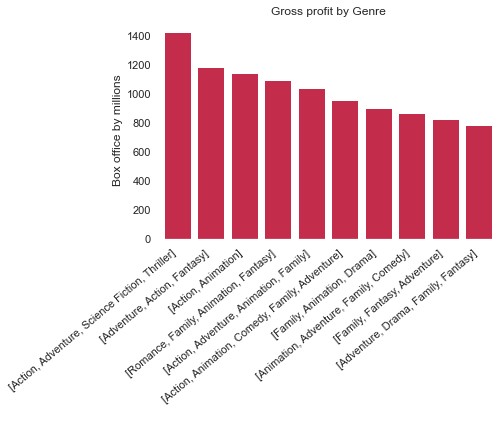

In [117]:
#movies were tagged with multiple genre on dataset
ax = sns.barplot( x=x2, y=y2, color='crimson', ci=None )



ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('Box office by millions')
ax.set_xlabel(' ')
ax.set_title('Gross profit by Genre');

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) 

## Plot, Top 10 Movies by Gross Profit

In [200]:
#noticed the movie Frozen in the top 20 had a dulplicate, and the row we would keep 
#after droping duplicates was showing Thriller as its genre
# df.loc[df['original_title'] == 'Frozen', 'genre_ids'] = '[Animation, Adventure, Family]'

In [201]:
# Droping Duplicates out of df
# df = df.drop_duplicates(subset='Unnamed: 0')

In [51]:
df_top_movies = df.sort_values(by=['gross_profit_by_millions'], ascending=False).head(10)

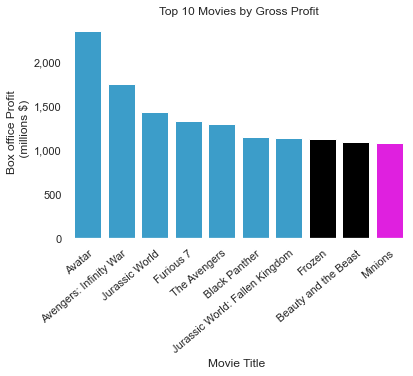

In [125]:
ax = sns.barplot( x=df_top_movies['original_title'], y=df_top_movies['gross_profit_by_millions'], palette = (['#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', 'black', 'black', 'magenta', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', '#25a6e0', 'magenta', '#25a6e0', '#25a6e0', 'black', 'magenta']), ci=None )



ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", rotation_mode='anchor')
ax.set_ylabel('Box office Profit \n (millions $)')
ax.set_xlabel('Movie Title ')
ax.set_title('Top 10 Movies by Gross Profit');
sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

#plt.savefig('../zippedData/Top_20_Movies_by_Gross_Profit_2', bbox_inches='tight', dpi=300);
# plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) 

## Exploring im.db.zip



In [68]:
! ls ../../../../../../project-exp/data/im.db   


GrossMargin_and_genre_df.csv
Merged_df_TMDB_TN.csv
Netflix_movies_and_tv_shows_clustering.csv.zip
Top_10_Movies_by_Gross_Profit_4.png
Top_20_Movies_by_Gross_Profit.png
Top_20_Movies_by_Gross_Profit_2.png
Top_20_Movies_by_Gross_Profit_3.png
all-weeks-global.tsv
bom.movie_gross.csv.gz
highest rated movies from TMDB action adv.png
highest rated movies from TMDB drama.png
im.db
im.db.zip
most popular movie titles from TMDB.png
netflix_top20_titles_hours.png
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz
top-netflix-scraper.ipynb
video game movies worldwide box office.png
video_game_films.csv


In [76]:
conn = sqlite3.connect('../../../../../../project-exp/data/im.db') # file route is to an unzipped file saved locally

All tables in SQL Dataset

In [93]:
pd.read_sql("""

SELECT * 
FROM sqlite_master

""", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [94]:
pd.read_sql("""

SELECT  
        basi.genres,
        COUNT()
        
        

FROM movie_basics AS basi



LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

group by basi.start_year

ORDER BY COUNT() DESC

""", conn)

,genres,COUNT()
0,"Comedy,Drama,Fantasy",17504
1,"Action,Crime,Drama",17272
2,Drama,16849
3,Sci-Fi,16243
4,"Adventure,Comedy,Romance",15589
5,"Action,Crime,Drama",14709
6,"Documentary,History",13787
7,"Animation,Drama,History",12900
8,Drama,11849
9,"Biography,Drama",8379


*Exploring movies that contain 'Drama' among their genres, only considering movies with numvotes above a 1000, went from 30788 values to 5044. got average rating*

In [95]:
Drama_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Drama%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]

In [96]:
# Following same steps as above but using Action Genre
Action_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Action%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]

In [97]:
# Following same steps as above but using Thriller/horror Genre
Thriller_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Thriller%' 
        AND basi.genres LIKE '%Horror%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]

In [98]:
# Following same steps as above but using Fantasy Genre
Fantasy_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Fantasy%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]
Fantasy_raitings

5.998060344827586

In [99]:
# Following same steps as above but using Sci-Fi Genre
Sci_Fi_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Sci-Fi%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]
Sci_Fi_raitings

5.714473684210526

In [100]:
# Following same steps as above but using Comedy Genre
Comedy_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Comedy%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]
Comedy_raitings

6.112916111850865

In [101]:
# Following same steps as above but using Adventure Genre
Adventure_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Adventure%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]
Adventure_raitings

6.156686626746507

In [102]:
# Following same steps as above but using Documentary Genre
Documentary_raitings = pd.read_sql("""

SELECT  basi.genres,
        rati.averagerating
        
FROM movie_basics AS basi

LEFT JOIN movie_ratings AS rati
ON basi.movie_id = rati.movie_id

WHERE basi.genres LIKE '%Documentary%' 
        AND rati.averagerating IS NOT NULL 
        AND rati.numvotes  > 1000


""", conn).mean()[0]

In [103]:
avg_raiting=[Drama_raitings, Action_raitings, Thriller_raitings, Fantasy_raitings, Sci_Fi_raitings, Comedy_raitings, Adventure_raitings, Documentary_raitings]
avg_raiting_name=['Drama', 'Action', 'Thriller', 'Fantasy', 'Sci_Fi', 'Comedy', 'Adventure', 'Documentary']


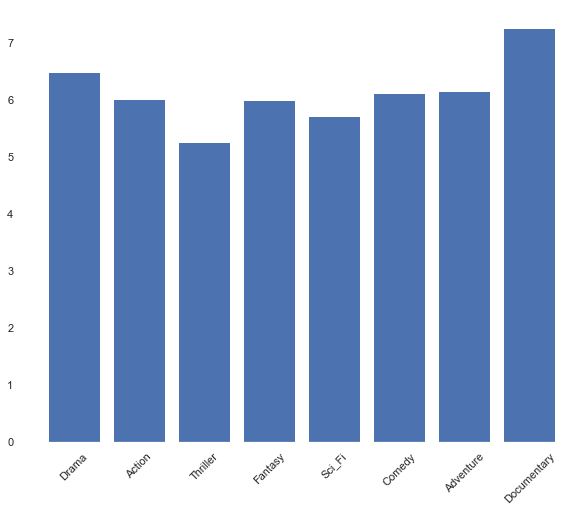

In [91]:
f, ax = plt.subplots(figsize=(10,8))

ax.bar(avg_raiting_name, avg_raiting)

plt.xticks(rotation = 45);